In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_ds = pd.read_csv(city_data_to_load)
ride_ds = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_ds = pd.merge(ride_ds, city_ds, on="city", how="outer")

# Display the data table for preview
merged_ds.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

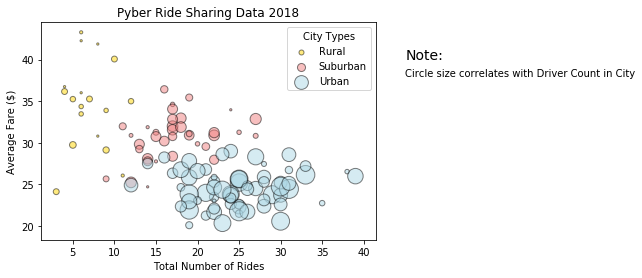

In [2]:
# Obtain the x and y coordinates for each of the three city types
#fare_df = merged_ds.groupby('city')['fare'].mean()
#rides_df = merged_ds.groupby('city')['ride_id'].count()
df_new = merged_ds.groupby(['city', 'driver_count','type'])
#df_new.head()

df_table = df_new['fare'].mean()
df_table = pd.DataFrame(df_table)
df_table['ride_count'] = pd.DataFrame(df_new['ride_id'].count())
df_table = df_table.rename(columns={'fare':'avg_fare'})
df_table = df_table.reset_index()
df_table.head()

# Build the scatter plots for each city types
rural = df_table.loc[df_table['type'] == 'Rural']
urban = df_table.loc[df_table['type'] == 'Urban']
suburban = df_table.loc[df_table['type'] == 'Suburban']

fig, ax = plt.subplots(sharex=True)

rural.plot(kind ='scatter', subplots = "true", x= 'ride_count', y = 'avg_fare', s=rural.driver_count*5, 
              c='Gold', ax=ax, label='Rural', alpha=0.5, edgecolors='black',linewidth=1)
suburban.plot(kind = 'scatter', subplots = 'true', x = 'ride_count', y = 'avg_fare', s=suburban.driver_count*5, 
              c='lightcoral', ax=ax, label='Suburban', alpha=0.5, edgecolors='black',linewidth=1)
urban.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare',s=urban.driver_count*5, 
              c='lightblue', ax=ax, label='Urban', alpha=0.5, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data 2018')

# Create a legend
plt.legend(loc='best',title='City Types')

# Incorporate a text label regarding circle size
plt.text(45, 40, 'Note:', fontsize=14)
plt.text(45, 38, 'Circle size correlates with Driver Count in City')

# Save Figure
plt.savefig('Pyber_MM.png')
plt.show()

## Total Fares by City Type

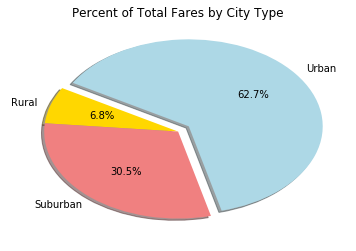

In [3]:
# Create Pie Table
pie_table = merged_ds[['type', 'fare','driver_count','ride_id']]

fare_pie = pd.DataFrame(pie_table.groupby('type')['fare'].sum())

# Set Parameters 
labels = ["Rural", "Suburban", "Urban"]
sizes = [fare_pie['fare'][0]/fare_pie['fare'].sum(),\
               fare_pie['fare'][1]/fare_pie['fare'].sum(),\
               fare_pie['fare'][2]/fare_pie['fare'].sum()]

colors = ["gold", "lightcoral", "lightblue"]
explode = (0, 0, 0.1)

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle=150, explode=explode, colors=colors, shadow = True)

plt.title('Percent of Total Fares by City Type')

# Save Figure
plt.savefig('Fares_Pie_MM.png')
plt.show()

## Total Rides by City Type

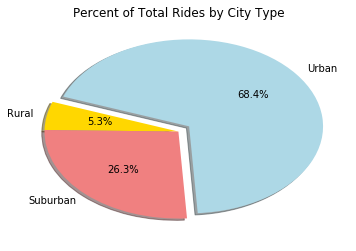

In [4]:
# Calculate Ride Percents
ride_pie = pd.DataFrame(pie_table.groupby('type')['ride_id'].count())

# Set Parameters
labels = ['Rural', 'Suburban', 'Urban']
sizes = [ride_pie['ride_id']['Rural']/ride_pie['ride_id'].sum(),\
        ride_pie['ride_id']['Suburban']/ride_pie['ride_id'].sum(),\
        ride_pie['ride_id']['Urban']/ride_pie['ride_id'].sum()]
colors = ['gold', 'lightcoral', 'lightblue']
explode = [0, 0, 0.1]

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 160, explode = explode, colors = colors, shadow = True)
plt.title("Percent of Total Rides by City Type")

# Save Figure
plt.savefig('Rides_Pie_MM.png')
plt.show()

## Total Drivers by City Type

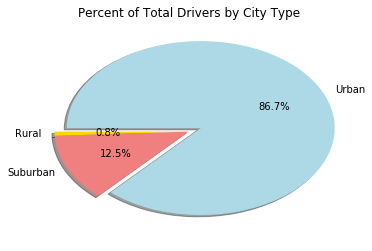

In [16]:
# Calculate Driver Percents
new_driver = pie_table['driver_count'].sum()
driver_pie = pd.DataFrame(pie_table.groupby('type')['driver_count'].sum())

# Build Pie Charts
labels = ['Rural', 'Suburban', 'Urban']
driver_sizes = [driver_pie['driver_count']['Rural']/new_driver,\
        driver_pie['driver_count']['Suburban']/new_driver,\
        driver_pie['driver_count']['Urban']/new_driver]
explode = (0, 0, 0.1)

# Build Pie Charts
fig1, ax1 = plt.subplots()
ax1.pie(driver_sizes, labels = labels, autopct = '%1.1f%%', startangle = 180, explode = explode, colors = colors, shadow = True)

plt.title('Percent of Total Drivers by City Type')

# Save Figure
plt.savefig('Drivers_Pie_MM.png')
plt.show()


In [17]:
new_driver = pie_table['driver_count'].sum()
new_driver

68709

In [19]:
driver_pie

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602
